Rough outline for cleaning:
1. See what is available
2. shrink memory footprint 
    by casting columns to different data types: 
        a. text to category where appropriate, 
        b. timestamp string to pandas datetimestamp.
3. look for outliers/bad data and drop rows that don't make sense

In [1]:
#import dependencies
import UDFs as u #User Defined Functions = UDFs
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Set file names for input and output. Change the name of file to choose a different file

infile  = 'Data/202012-citibike-tripdata.csv'
outfile = 'Data/202012-citibike_processed.csv'

In [3]:
df = pd.read_csv(infile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088929 entries, 0 to 1088928
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1088929 non-null  int64  
 1   starttime                1088929 non-null  object 
 2   stoptime                 1088929 non-null  object 
 3   start station id         1088929 non-null  int64  
 4   start station name       1088929 non-null  object 
 5   start station latitude   1088929 non-null  float64
 6   start station longitude  1088929 non-null  float64
 7   end station id           1088929 non-null  int64  
 8   end station name         1088929 non-null  object 
 9   end station latitude     1088929 non-null  float64
 10  end station longitude    1088929 non-null  float64
 11  bikeid                   1088929 non-null  int64  
 12  usertype                 1088929 non-null  object 
 13  birth year               1088929 non-null 

In [4]:
u.column_metadata(df)

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,9023,int64,8711560
1,starttime,1088532,object,88203377
2,stoptime,1088433,object,88203377
3,start station id,1174,int64,8711560
4,start station name,1174,object,83610662
5,start station latitude,1174,float64,8711560
6,start station longitude,1172,float64,8711560
7,end station id,1184,int64,8711560
8,end station name,1184,object,83608418
9,end station latitude,1184,float64,8711560


In [5]:
# make time columns timestamp instead of object to streamline memory usage. Station Name and usertype could be replaced to category
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [6]:
#Applying 'category' data type to string columns

category_columns = ['start station name', 'end station name', 'bikeid', 'usertype', 'gender']
for col in category_columns:
    df[col] = df[col].astype('category')

In [7]:
u.column_metadata(df)  #note that the now category columns take up far less memory than in first version of df.

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,9023,int64,8711560
1,starttime,1088532,datetime64[ns],8711560
2,stoptime,1088433,datetime64[ns],8711560
3,start station id,1174,int64,8711560
4,start station name,1174,category,2310854
5,start station latitude,1174,float64,8711560
6,start station longitude,1172,float64,8711560
7,end station id,1184,int64,8711560
8,end station name,1184,category,2311584
9,end station latitude,1184,float64,8711560


<Figure size 432x288 with 0 Axes>

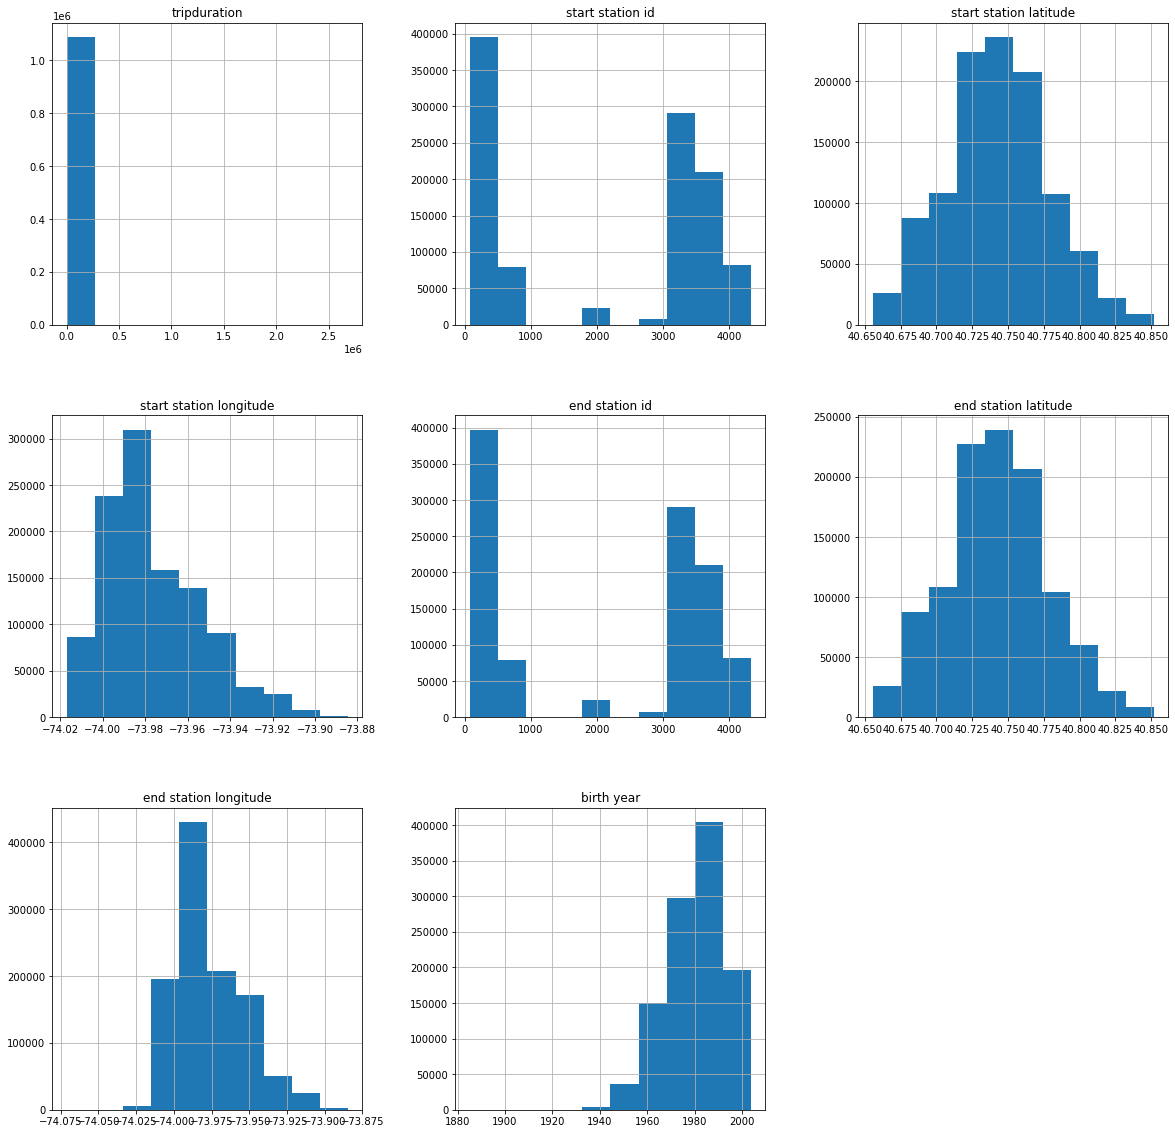

In [8]:
# Build histograms to profile data fields
fig=plt.figure()
df.hist(figsize=(20,20))
plt.show()

### Histograms Observations
* start/end station data look good, showing symmetry between the distributions for lat, lon, & station ID.
* birth year and trip duration are extremely skewed. These two will have to be explored further. 

In [9]:
#pull most frequent value from birth year, and report the percentage of records occupied by this value.
print(u.greatest_frequency(df, 'birth year'))



The value 1969 appears in the column 98,789 times, comprising 9% of all the records


In [10]:
df1, out_string = u.strip_high_fliers(df, 'tripduration')

In [11]:
print(out_string)

There are 56,862 out of 1,088,929 outliers, or 5%. These records will be excluded from analysis


In [12]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,694,2020-12-01 00:00:03.777,2020-12-01 00:11:38.316,4065,Wadsworth Ave & W 179 St,40.848467,-73.936064,3959,Edgecombe Ave & W 145 St,40.823498,-73.943860,49454,Customer,1988,2
2,1368,2020-12-01 00:00:28.747,2020-12-01 00:23:16.998,3443,W 52 St & 6 Ave,40.761330,-73.979820,3563,28 St & 36 Ave,40.757186,-73.932719,34312,Subscriber,1977,2
3,1707,2020-12-01 00:00:34.768,2020-12-01 00:29:02.647,72,W 52 St & 11 Ave,40.767272,-73.993929,3336,E 97 St & Madison Ave,40.787801,-73.953559,45491,Subscriber,1982,0
4,2182,2020-12-01 00:00:36.403,2020-12-01 00:36:59.033,3165,Central Park West & W 72 St,40.775794,-73.976206,3952,E 141 St & Jackson Ave,40.806896,-73.911837,16558,Customer,1997,1
5,654,2020-12-01 00:00:39.656,2020-12-01 00:11:34.295,3808,24 St & 41 Ave,40.752474,-73.939991,3619,Newtown Ave & 23 St,40.771361,-73.924615,43964,Customer,1969,0


In [13]:
df1.to_csv(outfile)   #write processed df to csv